<a href="https://colab.research.google.com/github/inforeqd512/QLearning/blob/main/Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task : Create New Proverbs using Markov Chains**

# **Markov Chains**

A Markov chain is fundamental to understanding Reinforcement Learning. 

It is a mathematical system that experiences transitions from one state to another according to certain probabilistic rules. The defining characteristic of a Markov chain is that no matter how the process arrived at its present state, the possible future states are fixed.

**Transition Matrix (denoted as P)**— For a system with N states, this is an NxN matrix. It represents the probability distribution of any state’s transition to another. The sum of probabilities in each row of the matrix will be 1, implying that this is a stochastic matrix.

**Discrete stochastic process** - Discrete stochastic processes are essentially probabilistic processes where interesting things (arrivals, departures, changes of state) occur at discrete instants of time separated by deterministic or random intervals. Discrete stochastic processes are to be distinguished from noise-like stochastic processes in which changes are continuously occurring and the sample paths are continuously varying functions of time.

<sup>Source: [Markov Chain Explained](https://towardsdatascience.com/markov-chain-explained-210581d7a4a9) from Towards Data Science</sup>

<sup>Source: [Discrete Stochastic Processes](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-262-discrete-stochastic-processes-spring-2011/) from MIT Open Courseware</sup>

In this notebook, we're specifically going to **generate text in the style of English proverbs**, so as a first step, we'll take a list of such proverbs (this is the corpus). Think about every word in this as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain. When we see the list of next words that appear after any word, we'll see words appearing frequently in line with the style of the proverbs.  

> For eg, 'A' is followed by 'good' 46% of the time, while it's followed by 'fool' 18% of the time

Then by following the beginning word to the next based on the probability of occurance, we're implicitly following it's transition probability matrix and constructing new proverbs. 

The predictions associated with a Markov process are conditional on its current state and is independent of past and future states.
This $memorylessness$ attribute is both a blessing and a curse to the Markov model in application. Imagine the scenario that you wish to predict words/sentences based on previously entered text (similar to how Google does for gmail). Well, the benefit of using the Markov process to do this is that the newly generated predictions would not be dependent on something you wrote paragraphs ago. However, the downfall to this is that you won’t be able to predict text which has context in a previous state of the model. This is a common problem in NLP (natural language processing) and an issue many models face.


Due to this, Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

In [31]:
proverbs = "A bad beginning makes a bad ending.\n\
A bad corn promise is better than a good lawsuit.\n\
A bad workman quarrels with his tools.\n\
A bargain is a bargain.\n\
A beggar can never be bankrupt.\n\
A bird in the hand is worth two in the bush.\n\
A bird may be known by its song.\n\
A black hen lays a white egg.\n\
A blind leader of the blind.\n\
A blind man would be glad to see.\n\
A broken friendship may be soldered, but will never be sound.\n\
A burden of one's own choice is not felt.\n\
A burnt child dreads the fire.\n\
A cat in gloves catches no mice.\n\
A city that parleys is half gotten.\n\
A civil denial is better than a rude grant.\n\
A clean fast is better than a dirty breakfast.\n\
A clean hand wants no washing.\n\.\n\
A clear conscience laughs at false accusations.\n\
A close mouth catches no flies.\n\
A cock is valiant on his own dunghill.\n\
A cracked bell can never sound well.\n\
A creaking door hangs long on its hinges.\n\
A cursed cow has short horns.\n\
A danger foreseen is half avoided.\n\
A drop in the bucket.\n\
A drowning man will catch at a straw.\n\
A fair face may hide a foul heart.\n\
A fault confessed is half redressed.\n\
A fly in the ointment.\n\
A fool always rushes to the fore.\n\
A fool and his money are soon parted.\n\
A fool at forty is a fool indeed.\n\
A fool may ask more questions in an hour than a wise man can answer in seven years.\n\
A fool may throw a stone into a well which a hundred wise men cannot pull out.\n\
A fool's tongue runs before his wit.\n\
A forced kindness deserves no thanks.\n\
A foul morn may turn to a fair day.\n\
A fox is not taken twice in the same snare.\n\
A friend in need is a friend indeed.\n\
A friend is never known till needed.\n\
A friend to all is a friend to none.\n\
A friend's frown is better than a foe's smile.\n\.\n\
A good anvil does not fear the hammer.\n\
A good beginning is half the battle.\n\
A good beginning makes a good ending.\n\
A good deed is never lost.\n\
A good dog deserves a good bone.\n\
A good example is the best sermon.\n\
A good face is a letter of recommendation.\n\
A good Jack makes a good Jill.\n\
A good marksman may miss.\n\
A good name is better than riches.\n\
A good name is sooner lost than won.\n\
A good name keeps its luster in the dark.\n\
A good wife makes a good husband.\n\
A great dowry is a bed full of brambles.\n\
A great fortune is a great slavery.\n\
A great ship asks deep waters.\n\
A guilty conscience needs no accuser.\n\
A hard nut to crack.\n\
A heavy purse makes a light heart.\n\
A hedge between keeps friendship green.\n\
A honey tongue, a heart of gall.\n\
A hungry belly has no ears.\n\
A hungry man is an angry man.\n\
A Jack of all trades is master of none.\n\
A Joke never gains an enemy but often loses a friend.\n\
A lawyer never goes to law himself.\n\
A lazy sheep thinks its wool heavy.\n\
A liar is not believed when he speaks the truth.\n\
A lie begets a lie.\n\
A light purse is a heavy curse.\n\
A light purse makes a heavy heart.\n\
A little body often harbors a great soul.\n\
A little fire is quickly trodden out.\n\
A man can die but once.\n\
A man can do no more than he can.\n\
A man is known by the company he keeps.\n\
A man of words and not of deeds is like a garden full of weeds.\n\
A miserly father makes a prodigal son.\n\
A miss is as good as a mile.\n\
A new broom sweeps clean.\n\
A nod from a lord is a breakfast for a fool.\n\
A penny saved is a penny gained.\n\
A penny soul never came to twopence.\n\
A quiet conscience sleeps in thunder.\n\
A rolling stone gathers no moss.\n\
A round peg in a square hole.\n\
A shy cat makes a proud mouse.\n\
A silent fool is counted wise.\n\
A small leak will sink a great ship.\n\
A soft answer turns away wrath.\n\
A sound mind in a sound body.\n\
A stitch in time saves nine.\n\
A storm in a teacup.\n\
A tattler is worse than a thief.\n\
A thief knows a thief as a wolf knows a wolf.\n\
A thief passes for a gentleman when stealing has made him rich.\n\
A threatened blow is seldom given.\n\
."

# Create Markov Chain from words in Proverbs

In [32]:
from collections import defaultdict

def markov_chain(text):
  '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''

  # Initialize a default dictionary to hold all of the words and next words
  m_dict = defaultdict(list)

  lines = text.split("\n")

  # Create a zipped list of all of the word pairs and put them in word: list of next words format
  for line in lines:
    # Tokenize the text by word, though including punctuation
    words = line.split(" ")
    for current_word, next_word in zip(words[0:-1], words[1:]):
      m_dict[current_word].append(next_word)

  # Convert the default dict back into a dictionary
  m_dict = dict(m_dict)
  return m_dict

In [33]:
proverb_dict = markov_chain(proverbs)

# Generate new Proverbs - Have fun! :-)

In [34]:
import random

def generate_sentence(chain, count=15):
  '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

  # For your new sentence, randomly choose a first word. Capitalize the first word
  beginning_word = random.choice(list(chain.keys())) 
  sentence = beginning_word.capitalize()

  next_word = beginning_word
  for i in range(0,count-1):
    if next_word in chain:
      next_word = random.choice(chain[next_word])
      sentence += " " + next_word

  # End it with a period`
  sentence += '.'
  return sentence

Here are some examples of generated sentences:

>'Choice is a heavy curse..'

>'Rolling stone gathers no thanks..'

>'Friend's frown is counted wise..'



In [45]:
generate_sentence(proverb_dict, 15)

'Deeds is better than a straw..'

# Visualise a part of the Markov Chain

**The Transition Probabilities** - The probabilities for the transition matrix is in the number of times the connected words repeat in the list. That way the chance of hitting a word when sampling randomly for the next word, will be defined by the number of repetitions of that word.

In [36]:
connected_words = proverb_dict['A']
connected_words

['bad',
 'bad',
 'bad',
 'bargain',
 'beggar',
 'bird',
 'bird',
 'black',
 'blind',
 'blind',
 'broken',
 'burden',
 'burnt',
 'cat',
 'city',
 'civil',
 'clean',
 'clean',
 'clear',
 'close',
 'cock',
 'cracked',
 'creaking',
 'cursed',
 'danger',
 'drop',
 'drowning',
 'fair',
 'fault',
 'fly',
 'fool',
 'fool',
 'fool',
 'fool',
 'fool',
 "fool's",
 'forced',
 'foul',
 'fox',
 'friend',
 'friend',
 'friend',
 "friend's",
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'great',
 'great',
 'great',
 'guilty',
 'hard',
 'heavy',
 'hedge',
 'honey',
 'hungry',
 'hungry',
 'Jack',
 'Joke',
 'lawyer',
 'lazy',
 'liar',
 'lie',
 'light',
 'light',
 'little',
 'little',
 'man',
 'man',
 'man',
 'man',
 'miserly',
 'miss',
 'new',
 'nod',
 'penny',
 'penny',
 'quiet',
 'rolling',
 'round',
 'shy',
 'silent',
 'small',
 'soft',
 'sound',
 'stitch',
 'storm',
 'tattler',
 'thief',
 'thief',
 'threatened']

In [37]:
def network_data(beginning_word):
  connected_words = proverb_dict[beginning_word]
  set_connected_words = set(connected_words)
  print("\n\nUniquely connected words for \'" , beginning_word, "\' : ", set_connected_words)

  #top most often connected words
  words_occurance = {}
  for word in set_connected_words:
    words_occurance[connected_words.count(word)] = word
  print("Top occurances : ", words_occurance)

  #word most often connected with beginning word
  max_occurance = max(list(words_occurance.keys()))
  max_occurance_word = words_occurance[max_occurance]
  print("Word most repeating in list : ", max_occurance_word)

  #total occurances in above list
  sum = 0
  for num_key in list(words_occurance.keys()):
    sum += num_key
  print("Total top repetitions : ", sum)

  #create the node->2nd level node connection list
  words_connection_list = []
  for word in list(words_occurance.values()):
    words_connection_list.append((beginning_word, word))
  print("Network node connections : ", words_connection_list)

  #compute the probability matrix based on top connections
  words_connection_probabilities = {}
  for num_connections in words_occurance:
    probability = round(num_connections / sum, 2)
    words_connection_probabilities[(beginning_word, words_occurance[num_connections])] = round(num_connections / sum, 2)
  print("Network edge connections (probabilities): ",words_connection_probabilities)

  return words_connection_list, words_connection_probabilities, max_occurance_word

beginning_word = 'A' #random.choice(list(proverb_dict.keys())) 
words_connection_list, words_connection_probabilities,  max_occurance_word = network_data(beginning_word)
words_connection_list2, words_connection_probabilities2,  max_occurance_word2 = network_data(max_occurance_word)




Uniquely connected words for ' A ' :  {'bad', 'quiet', 'fool', 'liar', 'burnt', 'bargain', 'good', 'blind', 'cock', 'bird', 'drowning', 'little', 'hedge', 'miserly', 'penny', 'forced', 'black', 'city', 'danger', 'friend', 'shy', 'stitch', "fool's", 'small', 'threatened', 'new', 'cracked', 'thief', 'Joke', 'man', 'cursed', 'fox', 'clear', 'honey', 'lazy', 'lie', 'Jack', 'great', 'drop', 'hard', 'close', 'lawyer', 'round', 'fly', 'light', 'heavy', 'fault', 'nod', 'civil', 'miss', 'beggar', 'foul', 'fair', 'sound', 'guilty', 'clean', "friend's", 'hungry', 'soft', 'cat', 'storm', 'tattler', 'silent', 'broken', 'burden', 'creaking', 'rolling'}
Top occurances :  {3: 'great', 1: 'rolling', 5: 'fool', 13: 'good', 2: 'hungry', 4: 'man'}
Word most repeating in list :  good
Total top repetitions :  28
Network node connections :  [('A', 'great'), ('A', 'rolling'), ('A', 'fool'), ('A', 'good'), ('A', 'hungry'), ('A', 'man')]
Network edge connections (probabilities):  {('A', 'great'): 0.11, ('A', 

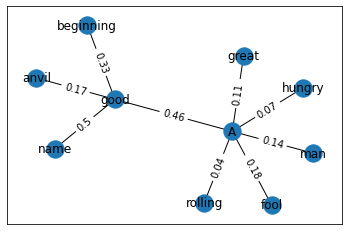

In [38]:
#visualise the graph
import networkx as nx
import pylab as plt

G = nx.Graph()
G.add_edges_from(words_connection_list)
G.add_edges_from(words_connection_list2)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edge_labels(G, pos, words_connection_probabilities)
nx.draw_networkx_edge_labels(G, pos, words_connection_probabilities2)
plt.show()